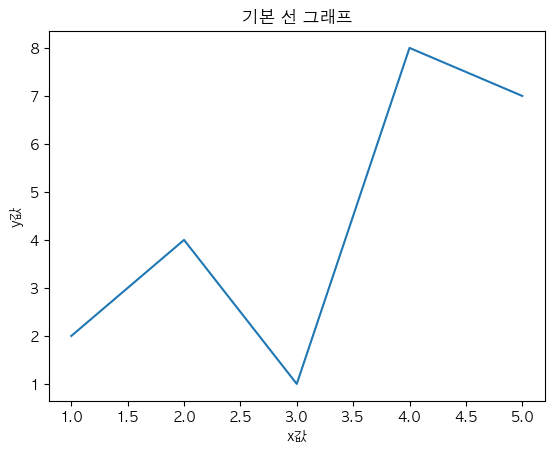

In [18]:

#2.빈칸 채우기

import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='AppleGothic'

x=[1,2,3,4,5]
y=[2,4,1,8,7]

plt.plot(x,y)
plt.title("기본 선 그래프")
plt.xlabel("x값")
plt.ylabel("y값")
plt.show()

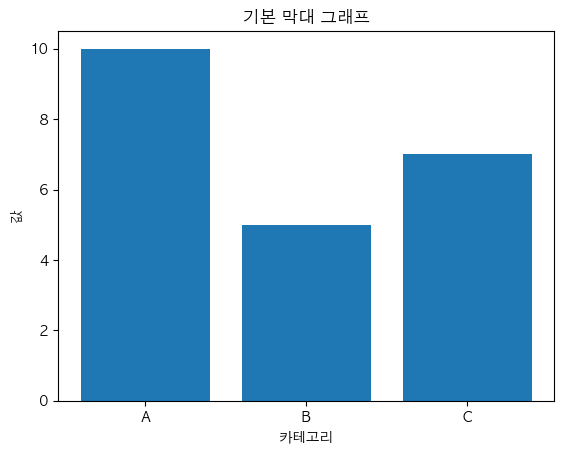

In [19]:
x=['A','B','C']
y=[10,5,7]

plt.bar(x,y)
plt.title("기본 막대 그래프")
plt.xlabel("카테고리")
plt.ylabel("값")
plt.show()

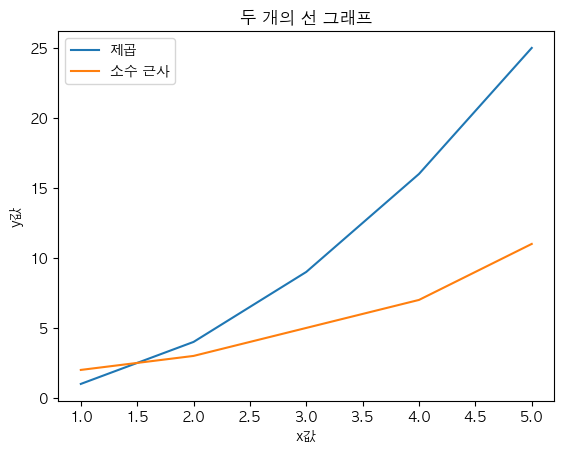

In [20]:
x=[1,2,3,4,5]
y1=[1,4,9,16,25]
y2=[2,3,5,7,11]

plt.plot(x,y1,label='제곱')
plt.plot(x,y2,label='소수 근사')

plt.title("두 개의 선 그래프")
plt.xlabel("x값")
plt.ylabel("y값")
plt.legend()
plt.show()

In [21]:
import seaborn as sns

tips=sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


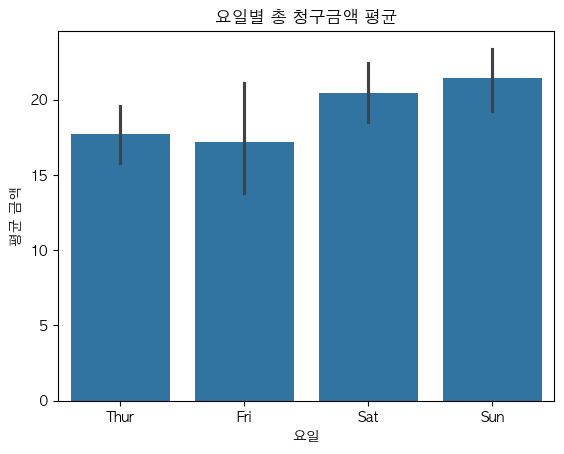

In [22]:
sns.barplot(x="day",y="total_bill",data=tips,)

plt.title("요일별 총 청구금액 평균")
plt.xlabel("요일")
plt.ylabel("평균 금액")
plt.show()


In [23]:
import pandas as pd

customer=pd.read_csv('customer_data.csv')
customer



,customer_id,age,gender,country,signup_date,last_active_date,churned,total_purchase
0,1,37.0,Female,Canada,2021-01-01,2021-02-01,0,212.20
1,2,41.0,Male,Japan,2021-01-02,2021-02-02,0,761.70
2,3,46.0,Male,USA,2021-01-03,2021-02-03,0,197.83
3,4,61.0,Male,Japan,2021-01-04,2021-02-04,0,435.39
4,5,55.0,Male,Germany,2021-01-05,2021-02-05,1,826.82
...,...,...,...,...,...,...,...,...
195,196,22.0,Male,France,2021-07-15,2021-08-15,1,742.99
196,197,27.0,Female,Korea,2021-07-16,2021-08-16,0,76.68
197,198,59.0,Female,Japan,2021-07-17,2021-08-17,0,393.42
198,199,55.0,Female,Canada,2021-07-18,2021-08-18,0,560.85


In [24]:
churned_rate=customer.groupby("country")["churned"].mean().sort_values(ascending=False).head()
churned_rate

country
France     0.416667
Japan      0.347826
USA        0.333333
Germany    0.315789
Korea      0.281250
Name: churned, dtype: float64

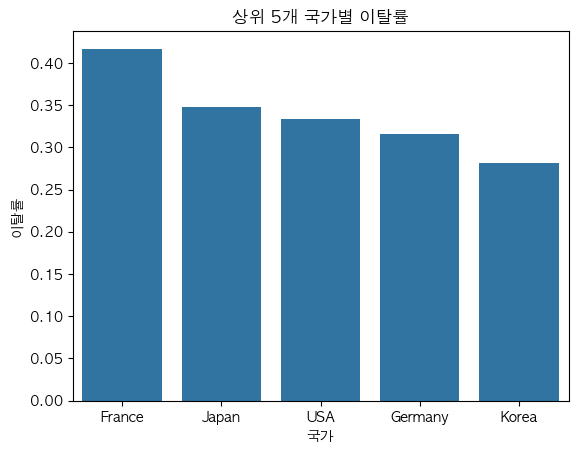

In [25]:
sns.barplot(x=churned_rate.index ,y=churned_rate.values)

plt.title("상위 5개 국가별 이탈률")
plt.xlabel("국가")
plt.ylabel("이탈률")
plt.show()

/var/folders/yj/mr3p43kx0gbdnjqp9p492cbr0000gn/T/ipykernel_1180/1133250624.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn= customer.groupby('age_group')['churned'].mean()


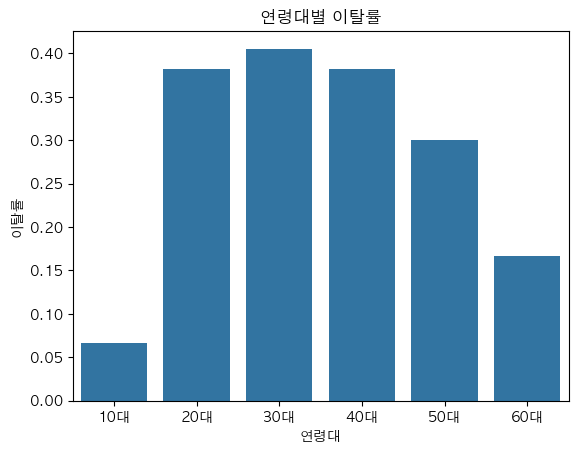

In [26]:
#연령대 :

#customer["age"].sort_values(ascending=False)
#cut() :숫자형 데이터를 구간으로 나노어 범주로 바꿔주는 함수

customer["age_group"]=pd.cut(customer["age"],bins=[10,20,30,40,50,60,70],labels=["10대","20대","30대","40대","50대","60대"])

age_churn= customer.groupby('age_group')['churned'].mean()

sns.barplot(x=age_churn.index,y=age_churn.values)

plt.title("연령대별 이탈률")
plt.xlabel("연령대")
plt.ylabel("이탈률")
plt.show()

In [27]:
customer['signup_date']=pd.to_datetime(customer['signup_date'])
customer['last_active_date']=pd.to_datetime(customer['last_active_date'])

#활동일 수의 계산
customer['active_days']=(customer['last_active_date']-customer['signup_date'])\
                        .dt.days
customer

,customer_id,age,gender,country,signup_date,last_active_date,churned,total_purchase,age_group,active_days
0,1,37.0,Female,Canada,2021-01-01,2021-02-01,0,212.20,30대,31
1,2,41.0,Male,Japan,2021-01-02,2021-02-02,0,761.70,40대,31
2,3,46.0,Male,USA,2021-01-03,2021-02-03,0,197.83,40대,31
3,4,61.0,Male,Japan,2021-01-04,2021-02-04,0,435.39,60대,31
4,5,55.0,Male,Germany,2021-01-05,2021-02-05,1,826.82,50대,31
...,...,...,...,...,...,...,...,...,...,...
195,196,22.0,Male,France,2021-07-15,2021-08-15,1,742.99,20대,31
196,197,27.0,Female,Korea,2021-07-16,2021-08-16,0,76.68,20대,31
197,198,59.0,Female,Japan,2021-07-17,2021-08-17,0,393.42,50대,31
198,199,55.0,Female,Canada,2021-07-18,2021-08-18,0,560.85,50대,31


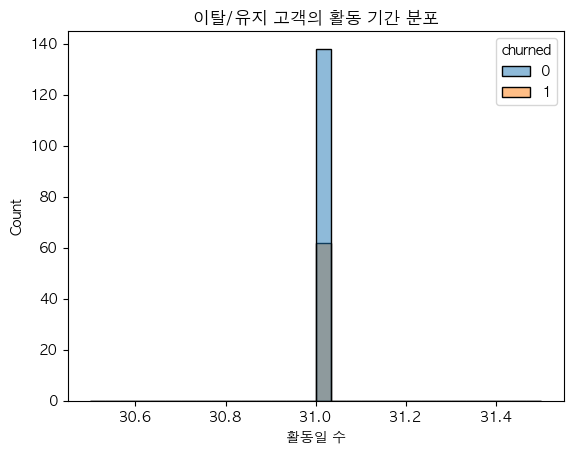

In [30]:
#히스토그램 그래프
sns.histplot(data=customer,x="active_days",hue="churned",kde=True,bins=30)

plt.title("이탈/유지 고객의 활동 기간 분포")
plt.xlabel("활동일 수")
plt.show()